# Students' Academic Performance Dataset
xAPI-Educational Mining Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 귀찮은거
def CheckDf(df: pd.DataFrame):
    
    vnames = [name for name in globals() if globals()[name] is df][0]
    
    line = " ----- " * 10
    
    print(f"┌▣ {vnames}.shape" + line)
    display(df.shape)
    print("\n\n" + f"┌▣ {vnames}.sample" + line + "\n|")
    display(df.sample(10))
    print("\n\n" + f"┌▣ {vnames}.info()" + line + "\n|")
    display(df.info())
    print("\n\n" + f"┌▣ {vnames}.describe()" + line + "\n|")
    display(df.describe())

    if "object" in df.dtypes.values:
        print("\n\n" + f"┌▣ {vnames}.describe(include='object')" + line + "\n|")
        display(df.describe(include='object'))

    if "category" in df.dtypes.values:
        print("\n\n" + f"┌▣ {vnames}.describe(include='category')" + line + "\n|")
        display(df.describe(include='category'))

## 불러오기

In [3]:
file = "data\\xAPI-Edu-Data.csv"
df = pd.read_csv(file, index_col=False)
df.sample(10)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
117,F,KW,KuwaIT,lowerlevel,G-02,C,IT,F,Mum,25,29,40,17,No,Good,Under-7,H
48,F,KW,KuwaIT,HighSchool,G-12,A,English,F,Mum,13,80,40,88,Yes,Good,Under-7,H
155,M,SaudiArabia,USA,HighSchool,G-11,B,Math,S,Father,70,58,73,91,Yes,Bad,Under-7,H
50,F,KW,KuwaIT,HighSchool,G-12,A,English,F,Father,20,14,12,70,No,Bad,Above-7,L
422,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Mum,70,69,46,45,Yes,Good,Above-7,M
14,F,KW,KuwaIT,MiddleSchool,G-08,A,Math,F,Mum,62,70,44,60,No,Bad,Above-7,H
408,M,Jordan,Jordan,MiddleSchool,G-07,B,Biology,F,Father,50,79,10,31,No,Bad,Under-7,M
454,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,45,87,57,80,Yes,Good,Under-7,M
447,M,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Mum,71,84,67,80,Yes,Good,Under-7,M
12,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,5,1,0,11,No,Bad,Above-7,L


# 전처리

In [4]:
# NationalITy, PlaceofBirth
## 위 두 컬럼에서 KW와 KuwaIT는 같은 의미이므로 KW를 KuwaIT로 바꿈
print(df["NationalITy"].value_counts()["KW"])
df.loc[df["NationalITy"] == 'KW', "NationalITy"] = 'KuwaIT'
print(df["NationalITy"].value_counts()["KuwaIT"])

179
179


In [5]:
# 파생변수 immigration 생성
df["immigration"] = df["NationalITy"]
df.loc[df["NationalITy"] == df["PlaceofBirth"], "immigration"] = False
df.loc[df["NationalITy"] != df["PlaceofBirth"], "immigration"] = True
df["immigration"].sample(10)

73     False
287    False
348    False
244    False
266    False
136     True
161    False
232    False
54     False
229    False
Name: immigration, dtype: object

In [6]:
def tmpf(x):
    Topic = {0: ["English", "Spanish", "French", "Arabic", "History", "Quran"],
            1: ["IT", "Math", "Chemistry", "Biology", "Science", "Geology"]}
    for i, j in Topic.items():
        if x in j:
            x = i
            break
    return x

df["Topic"] = df["Topic"].map(tmpf)
df["Topic"].sample(10)

394    1
33     0
180    0
375    0
157    1
367    0
8      1
69     1
410    1
158    1
Name: Topic, dtype: int64

In [7]:
# drop
df = df.drop(columns=["PlaceofBirth", "NationalITy", "GradeID", "SectionID", "Semester", "ParentAnsweringSurvey"])

In [8]:
# 컬럼 순서 변경
df = df[['gender', 'immigration', 'StageID', 'Topic', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']]

In [9]:
CheckDf(df)

┌▣ df.shape -----  -----  -----  -----  -----  -----  -----  -----  -----  ----- 


(480, 12)



┌▣ df.sample -----  -----  -----  -----  -----  -----  -----  -----  -----  ----- 
|


,gender,immigration,StageID,Topic,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentschoolSatisfaction,StudentAbsenceDays,Class
371,M,False,lowerlevel,0,Father,35,2,29,23,Bad,Under-7,M
452,F,False,MiddleSchool,1,Father,25,82,52,20,Good,Above-7,M
225,M,False,MiddleSchool,0,Mum,72,90,12,30,Bad,Under-7,M
355,M,False,lowerlevel,0,Mum,35,97,41,23,Good,Under-7,H
357,M,False,lowerlevel,0,Father,25,87,21,27,Good,Under-7,M
298,M,False,lowerlevel,1,Father,18,17,26,34,Good,Above-7,M
372,F,False,lowerlevel,0,Father,10,20,22,97,Bad,Above-7,L
71,M,False,MiddleSchool,1,Father,29,22,9,20,Good,Under-7,M
380,F,False,lowerlevel,0,Father,11,20,20,98,Bad,Above-7,L
18,F,False,MiddleSchool,1,Mum,69,15,36,96,Good,Under-7,M




┌▣ df.info() -----  -----  -----  -----  -----  -----  -----  -----  -----  ----- 
|
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   immigration               480 non-null    object
 2   StageID                   480 non-null    object
 3   Topic                     480 non-null    int64 
 4   Relation                  480 non-null    object
 5   raisedhands               480 non-null    int64 
 6   VisITedResources          480 non-null    int64 
 7   AnnouncementsView         480 non-null    int64 
 8   Discussion                480 non-null    int64 
 9   ParentschoolSatisfaction  480 non-null    object
 10  StudentAbsenceDays        480 non-null    object
 11  Class                     480 non-null    object
dtypes: int64(5), object(7)
memory usage: 45.1+ KB


None



┌▣ df.describe() -----  -----  -----  -----  -----  -----  -----  -----  -----  ----- 
|


,Topic,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.510417,46.775000,54.797917,37.918750,43.283333
std,0.500413,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,15.750000,20.000000,14.000000,20.000000
50%,1.000000,50.000000,65.000000,33.000000,39.000000
75%,1.000000,75.000000,84.000000,58.000000,70.000000
max,1.000000,100.000000,99.000000,98.000000,99.000000




┌▣ df.describe(include='object') -----  -----  -----  -----  -----  -----  -----  -----  -----  ----- 
|


,gender,immigration,StageID,Relation,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480
unique,2,2,3,2,2,2,3
top,M,False,MiddleSchool,Father,Good,Under-7,M
freq,305,425,248,283,292,289,211


# 피쳐

## 인코딩
### 불변 col
["Class"]

In [10]:
df_en = df.copy()

In [11]:
# OrdinalEncoding
# {"Class": "H": 1, "M": 0, "L": -1}

tmpd = {"H": 1, "M": 0, "L": -1}
df_en["Class"] = df_en["Class"].map(tmpd)
df_en["Class"] = df_en["Class"].astype('int8')
df_en["Class"].describe()

count    480.000000
mean       0.031250
std        0.748738
min       -1.000000
25%       -1.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Class, dtype: float64

In [12]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_en['raisedhands'] = preprocessing.scale(df_en['raisedhands'])
df_en['VisITedResources'] = preprocessing.scale(df_en['VisITedResources'])
df_en['AnnouncementsView'] = preprocessing.scale(df_en['AnnouncementsView'])
df_en['Discussion'] = preprocessing.scale(df_en['Discussion'])

### Case1 - Label Encoding

In [13]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

df_lbe = df_en.copy()
encoder = LabelEncoder()

encoder_col = ['gender', "immigration", "StageID", "Topic", 'Relation', 'ParentschoolSatisfaction', 'StudentAbsenceDays']
for i in encoder_col:
    if i in df_lbe:
        df_lbe[i] = encoder.fit_transform(df_lbe[i])

# 타입 변경
df_lbe[encoder_col] = df_lbe[encoder_col].astype('category')

CheckDf(df_lbe)

┌▣ df_lbe.shape -----  -----  -----  -----  -----  -----  -----  -----  -----  ----- 


(480, 12)



┌▣ df_lbe.sample -----  -----  -----  -----  -----  -----  -----  -----  -----  ----- 
|


,gender,immigration,StageID,Topic,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentschoolSatisfaction,StudentAbsenceDays,Class
200,1,0,1,0,1,-1.033429,1.065260,0.529699,1.438544,0,1,1
418,1,1,1,1,0,1.340775,1.065260,1.432514,1.366104,1,1,1
132,1,0,2,1,0,-1.521279,-1.567471,-1.050228,-1.459069,0,0,-1
168,1,0,2,0,1,0.430121,-0.084669,-0.561203,-0.372464,1,1,1
357,1,0,2,0,0,-0.708196,0.974476,-0.636438,-0.589785,1,1,0
265,0,0,1,0,1,1.048065,0.883692,1.658218,-0.227583,0,1,1
143,1,0,1,0,0,1.080588,1.065260,0.642551,-0.879546,1,1,1
256,0,0,2,0,1,1.080588,0.974476,1.282045,0.605480,1,1,1
214,1,0,1,0,0,-0.968383,-0.145191,-1.351167,-1.422849,0,0,-1
12,1,0,2,1,0,-1.358663,-1.627994,-1.426401,-1.169308,0,0,-1




┌▣ df_lbe.info() -----  -----  -----  -----  -----  -----  -----  -----  -----  ----- 
|
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   gender                    480 non-null    category
 1   immigration               480 non-null    category
 2   StageID                   480 non-null    category
 3   Topic                     480 non-null    category
 4   Relation                  480 non-null    category
 5   raisedhands               480 non-null    float64 
 6   VisITedResources          480 non-null    float64 
 7   AnnouncementsView         480 non-null    float64 
 8   Discussion                480 non-null    float64 
 9   ParentschoolSatisfaction  480 non-null    category
 10  StudentAbsenceDays        480 non-null    category
 11  Class                     480 non-null    int8    
dtypes: category(7),

None



┌▣ df_lbe.describe() -----  -----  -----  -----  -----  -----  -----  -----  -----  ----- 
|


,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class
count,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,480.000000
mean,9.008997e-17,-1.614449e-16,-1.431725e-16,6.707597e-17,0.031250
std,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,0.748738
min,-1.521279e+00,-1.658255e+00,-1.426401e+00,-1.531509e+00,-1.000000
25%,-1.009037e+00,-1.053029e+00,-8.997589e-01,-8.433262e-01,-1.000000
50%,1.048878e-01,3.087281e-01,-1.850301e-01,-1.551430e-01,0.000000
75%,9.179714e-01,8.836924e-01,7.554025e-01,9.676820e-01,1.000000
max,1.731055e+00,1.337612e+00,2.260095e+00,2.018067e+00,1.000000




┌▣ df_lbe.describe(include='category') -----  -----  -----  -----  -----  -----  -----  -----  -----  ----- 
|


,gender,immigration,StageID,Topic,Relation,ParentschoolSatisfaction,StudentAbsenceDays
count,480,480,480,480,480,480,480
unique,2,2,3,2,2,2,2
top,1,0,1,1,0,1,1
freq,305,425,248,245,283,292,289


### Case2 - OneHotEncoding

In [14]:
## onehoten
df_ohe = df_en.copy()
encoder_col = ['gender', "immigration", "StageID", "Topic", 'Relation', 'ParentschoolSatisfaction', 'StudentAbsenceDays']

df_ohe = pd.get_dummies(df_ohe, columns=encoder_col, drop_first = True)

CheckDf(df_ohe)

┌▣ df_ohe.shape -----  -----  -----  -----  -----  -----  -----  -----  -----  ----- 


(480, 13)



┌▣ df_ohe.sample -----  -----  -----  -----  -----  -----  -----  -----  -----  ----- 
|


,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_M,immigration_True,StageID_MiddleSchool,StageID_lowerlevel,Topic_1,Relation_Mum,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
379,-1.130999,-0.992507,0.793020,1.438544,-1,1,0,0,1,0,0,0,0
136,0.755355,0.762647,2.147243,0.967682,1,0,1,0,0,0,1,1,1
400,-0.252869,0.490296,0.078291,-0.626005,0,1,0,1,0,1,0,1,0
74,-1.130999,-1.658255,-1.200697,-1.096867,-1,1,0,1,0,1,0,0,1
12,-1.358663,-1.627994,-1.426401,-1.169308,-1,1,0,0,1,1,0,0,0
232,-0.903336,0.520557,-0.862142,0.243279,0,1,0,1,0,0,0,1,0
45,-0.870813,-1.295120,-0.862142,0.967682,-1,1,0,1,0,0,0,1,0
75,0.104888,1.065260,-0.335499,0.605480,0,1,0,1,0,0,1,1,1
415,-1.228569,-1.446426,-1.087845,-1.459069,-1,0,0,1,0,1,1,1,0
476,0.104888,0.671863,-0.899759,-0.553565,0,0,0,1,0,1,0,0,1




┌▣ df_ohe.info() -----  -----  -----  -----  -----  -----  -----  -----  -----  ----- 
|
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   raisedhands                    480 non-null    float64
 1   VisITedResources               480 non-null    float64
 2   AnnouncementsView              480 non-null    float64
 3   Discussion                     480 non-null    float64
 4   Class                          480 non-null    int8   
 5   gender_M                       480 non-null    uint8  
 6   immigration_True               480 non-null    uint8  
 7   StageID_MiddleSchool           480 non-null    uint8  
 8   StageID_lowerlevel             480 non-null    uint8  
 9   Topic_1                        480 non-null    uint8  
 10  Relation_Mum                   480 non-null    uint8  
 11  ParentschoolSatisfa

None



┌▣ df_ohe.describe() -----  -----  -----  -----  -----  -----  -----  -----  -----  ----- 
|


,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_M,immigration_True,StageID_MiddleSchool,StageID_lowerlevel,Topic_1,Relation_Mum,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
count,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,9.008997e-17,-1.614449e-16,-1.431725e-16,6.707597e-17,0.031250,0.635417,0.114583,0.516667,0.414583,0.510417,0.410417,0.608333,0.602083
std,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,0.748738,0.481815,0.318851,0.500244,0.493164,0.500413,0.492423,0.488632,0.489979
min,-1.521279e+00,-1.658255e+00,-1.426401e+00,-1.531509e+00,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.009037e+00,-1.053029e+00,-8.997589e-01,-8.433262e-01,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.048878e-01,3.087281e-01,-1.850301e-01,-1.551430e-01,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,9.179714e-01,8.836924e-01,7.554025e-01,9.676820e-01,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.731055e+00,1.337612e+00,2.260095e+00,2.018067e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# ML
## 학습 데이터 셋

In [15]:
# 사용할 데이터 프레임 선언
## df_lbe
## df_ohe

df_ml = df_ohe

In [16]:
# 컬럼 선언
## 종속변수 컬럼
label_name = "Class"
## 독립변수 컬럼
feature_names = df_ml.columns.tolist()
feature_names.remove(label_name)

In [17]:
# X y
X = df_ml[feature_names]
y = df_ml[label_name]
print(X.shape, y.shape)
display(X.head())
display(y.head())

(480, 12) (480,)


,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_M,immigration_True,StageID_MiddleSchool,StageID_lowerlevel,Topic_1,Relation_Mum,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
0,-1.033429,-1.174075,-1.351167,-0.843326,1,0,0,1,1,0,1,1
1,-0.870813,-1.053029,-1.313549,-0.662225,1,0,0,1,1,0,1,1
2,-1.196046,-1.446426,-1.426401,-0.481125,1,0,0,1,1,0,0,0
3,-0.545579,-0.901723,-1.238315,-0.300024,1,0,0,1,1,0,0,0
4,-0.220346,-0.145191,-0.974994,0.243279,1,0,0,1,1,0,0,0


0    0
1    0
2   -1
3   -1
4    0
Name: Class, dtype: int8

In [18]:
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((384, 12), (96, 12), (384,), (96,))

## 알고리즘 가져오기

### ML Model

In [19]:
# model
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()

### Hyper Parameter Search Model

#### GridSearchCV (함수사용)

In [20]:
def printAndReturn_best_params(
    MLmodel,
    searchCV,
    params: dict,
    X_train,
    y_train,
    cv_iterable: list=list(range(2,8)),
    scoring: str="accuracy",
    n_jobs=-1,
    verbose=2)->dict: 
    
    
    
    best_cv = []
    best_params = []
    best_score = -2
    
    for k in cv_iterable:
        
        param_opt = searchCV(
            MLmodel,
            params,
            cv=k,
            scoring = scoring,
            n_jobs=-1,
            verbose=2)
        
        param_opt.fit(X_train, y_train)
        
        if best_score < param_opt.best_score_:
            best_score = param_opt.best_score_
            best_estimator = [param_opt.estimator]
            best_params = [param_opt.best_params_]
            best_cv = [k]
            
        elif best_score == param_opt.best_score_:
            best_estimator.append(param_opt.estimator)
            best_params.append(param_opt.best_params_)
            best_cv.append(k)
            

    if len(best_params) == 1:
        best_estimator = best_estimator[0]
        best_params = best_params[0]
        best_cv = best_cv[0]
    
    line = " ----- " * 10
    print(fr"┌▣ BEST {line}")
    
    print(best_estimator)
    print("{" + fr""""cv": {best_cv},""")
    print(fr""""params": {best_params},""")
    print(fr""""score": {best_score}""" + "}")
    
    
    return best_params

In [21]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors' : list(range(1,40)),
    'leaf_size': list(range(1,7)),
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

best_params = printAndReturn_best_params(model_knn, GridSearchCV, params, X_train, y_train, range(2, 9))

model = KNeighborsClassifier(
    leaf_size=best_params['leaf_size'], 
    metric=best_params['metric'], 
    n_neighbors=best_params['n_neighbors'],
    weights=best_params['weights'])


Fitting 2 folds for each of 1404 candidates, totalling 2808 fits
Fitting 3 folds for each of 1404 candidates, totalling 4212 fits
Fitting 4 folds for each of 1404 candidates, totalling 5616 fits
Fitting 5 folds for each of 1404 candidates, totalling 7020 fits
Fitting 6 folds for each of 1404 candidates, totalling 8424 fits
Fitting 7 folds for each of 1404 candidates, totalling 9828 fits
Fitting 8 folds for each of 1404 candidates, totalling 11232 fits
┌▣ BEST  -----  -----  -----  -----  -----  -----  -----  -----  -----  ----- 
KNeighborsClassifier()
{"cv": 5,
"params": {'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'},
"score": 0.7474367737525632}


#### GridSearchCV (함수미사용)

In [22]:
# # param
# from sklearn.model_selection import GridSearchCV

# params = {
#     'n_neighbors' : list(range(1,40)),
#     'leaf_size': list(range(1,7)),
#     'weights' : ["uniform", "distance"],
#     'metric' : ['euclidean', 'manhattan', 'minkowski']
# }

# print(model)
# print(feature_names)

# for k in range(2, 9):
#     clf = GridSearchCV(
#         model,
#         params,
#         cv=k,
#         scoring="accuracy",
#         n_jobs=-1,
#         verbose=2)

#     print(f"\ncv = {k}")
#     clf.fit(X_train, y_train)
#     print(clf.best_params_)
#     print(clf.best_score_)

In [23]:
# # best model
# param ={'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
# model = KNeighborsClassifier(leaf_size=param['leaf_size'], metric=param['metric'], n_neighbors=param['n_neighbors'],
#                      weights=param['weights'])
# model.fit(X_train, y_train)

#### RandomizedSearchCV

In [24]:
# from sklearn.model_selection import RandomizedSearchCV

# param_distributions = { 'n_neighbors' : np.random.randint(3, 25, 10),
#                         'leaf_size': list(range(1,3)),
#                         'weights' : ["uniform", "distance"],
#                         'metric' : ['euclidean', 'manhattan', 'minkowski']}

# clfr = RandomizedSearchCV(model,
#                           param_distributions=param_distributions,
#                           n_iter=15,
#                           cv=5,
#                           scoring="accuracy", 
#                           n_jobs=-1,
#                           random_state=42, verbose=2)
# clfr.fit(X_train, y_train)

In [25]:
# print(feature_names)
# print(clfr.best_estimator_)
# print(clfr.best_params_)
# print(clfr.best_score_)

## 학습

In [26]:
model.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=1, metric='manhattan', weights='distance')

## 예측

In [27]:
y_predict = model.predict(X_test)
y_predict = pd.Series(y_predict)
y_predict.head()


0    0
1    0
2   -1
3    0
4    1
dtype: int8

## 평가

In [28]:
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.8229


In [29]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8229166666666666

In [30]:
df_y = pd.DataFrame({"true" : y_train, "predict" : y_predict})
df_y.head()

,true,predict
0,NaN,0.0
1,0.0,0.0
2,-1.0,-1.0
3,NaN,0.0
4,0.0,1.0


In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          -1       0.89      0.92      0.91        26
           0       0.79      0.81      0.80        42
           1       0.81      0.75      0.78        28

    accuracy                           0.82        96
   macro avg       0.83      0.83      0.83        96
weighted avg       0.82      0.82      0.82        96



### 시각화

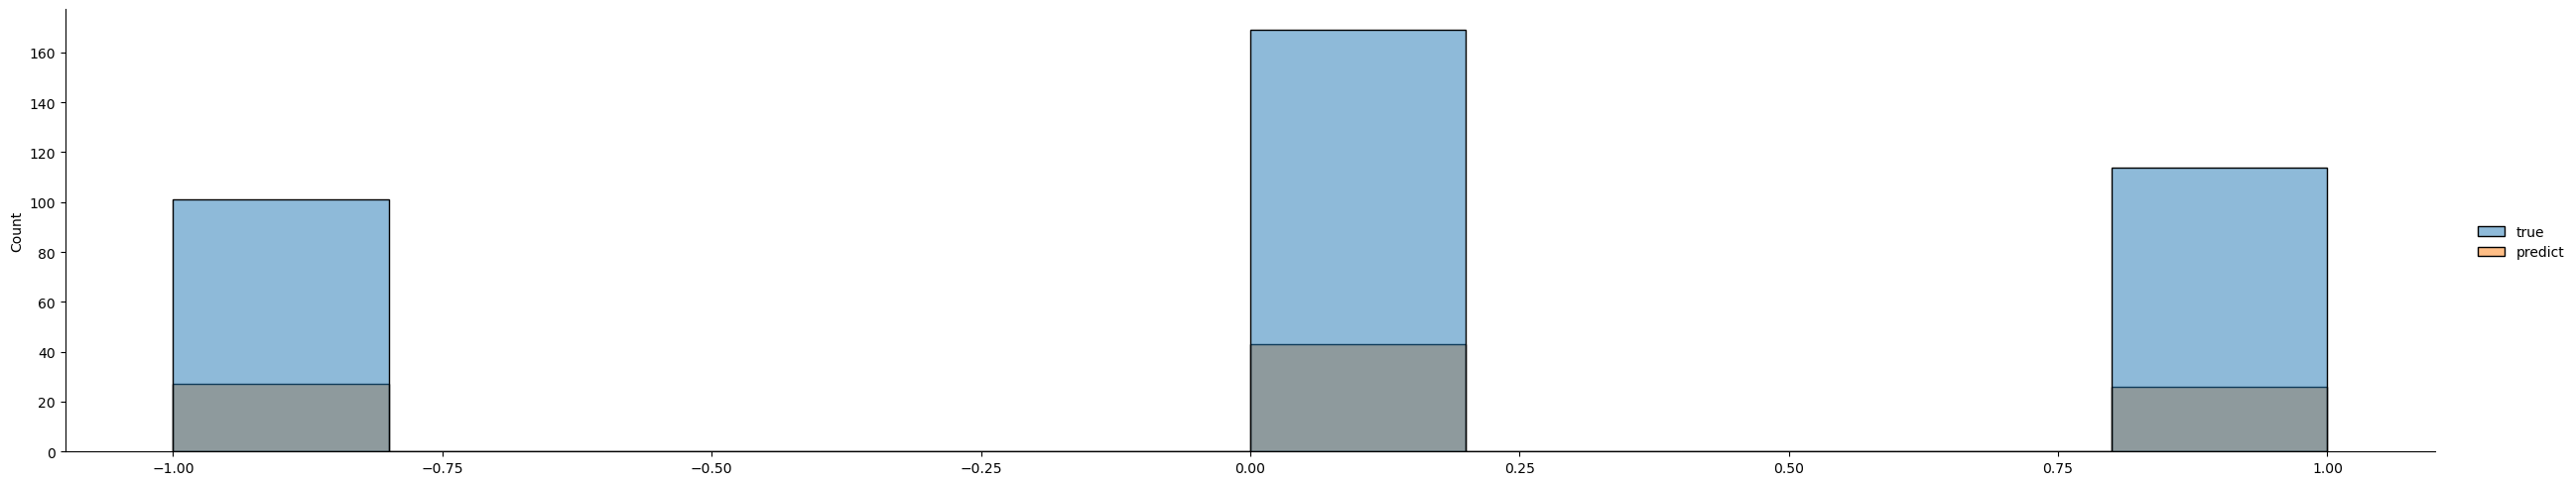

In [32]:
sns.displot(df_y, aspect=5)